## MLE Task
Given the Boston Housing dataset, train a Machine Learning model that predicts the value of a house given some of its attributes.  This model should be served so an end customer can enter the attributes to a website and obtain a prediction.

In [154]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#loading the dataset, which is npz format (zipped) and returns a tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)
npz=tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113)

In [155]:
# create a dataframe with the train and test data
train_data = np.column_stack((npz[0][0],npz[0][1]))
test_data = np.column_stack((npz[1][0],npz[1][1]))
data = np.concatenate((train_data,test_data))
column_values = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df= pd.DataFrame(data, columns = column_values)

In [156]:
df.shape

(506, 14)

In [157]:
# an overview of the dataset
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


## Task 1 : Perform data engineering (data preprocessing) on the data set as needed.
- Taking care of Missing values
- Taking care of Categorical Features
- Normalization of data set
- Splitting of the data set in Training and Validation sets

In [158]:
# checking if there is any missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [159]:
# checking the data types categorical or numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [160]:
df.MEDV.max(), df.MEDV.min()

(50.0, 5.0)

<AxesSubplot:>

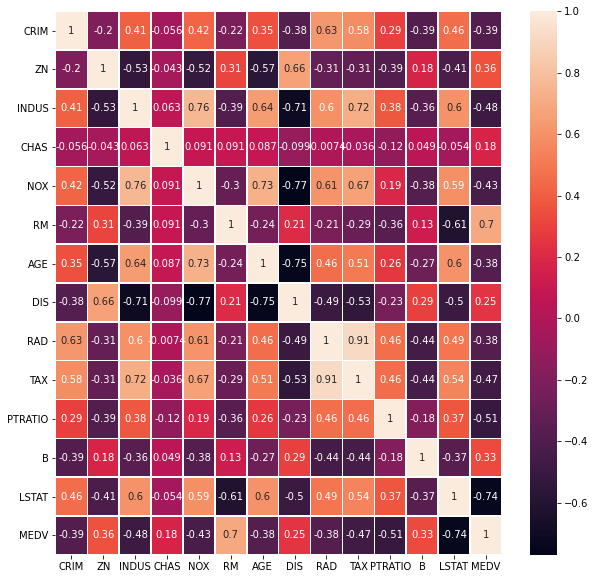

In [161]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(),annot=True, linewidths=.5, ax=ax)

In [162]:
# removing features which we will not utilize to calculate the price prediction
new_df = df.drop(['CRIM','ZN', 'INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B'], axis = 1)

In [163]:
new_df.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.142,21.0,18.72,15.2
1,7.610,14.7,3.11,42.3
2,4.970,20.2,3.26,50.0
3,6.037,20.2,8.01,21.1
4,6.376,20.2,14.65,17.7


- Houses with more rooms (higher ‘RM’ value) will worth more. Usually houses with more rooms are bigger and can fit more people, so it is reasonable that they cost more money. They are directly proportional variables.
- Neighborhoods with more lower class workers (higher ‘LSTAT’ value) will worth less. If the percentage of lower working class people is higher, it is likely that they have low purchasing power and therefore, they houses will cost less. They are inversely proportional variables.
- Neighborhoods with more students to teachers ratio (higher ‘PTRATIO’ value) will be worth less. If the percentage of students to teachers ratio people is higher, it is likely that in the neighborhood there are less schools, this could be because there is less tax income which could be because in that neighborhood people earn less money. If people earn less money it is likely that their houses are worth less. They are inversely proportional variables.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


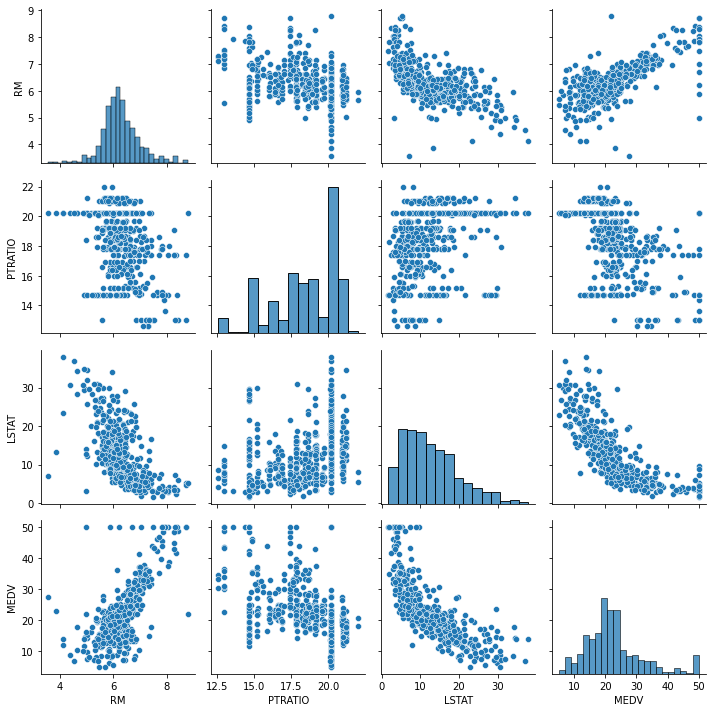

In [164]:
sns.pairplot(new_df, size=2.5)
plt.tight_layout()

## Data Normalization

In [173]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
new_df = norm.fit_transform(new_df)
df2 = pd.DataFrame(new_df, columns=['RM','PTRATIO','LSTAT','MEDV'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


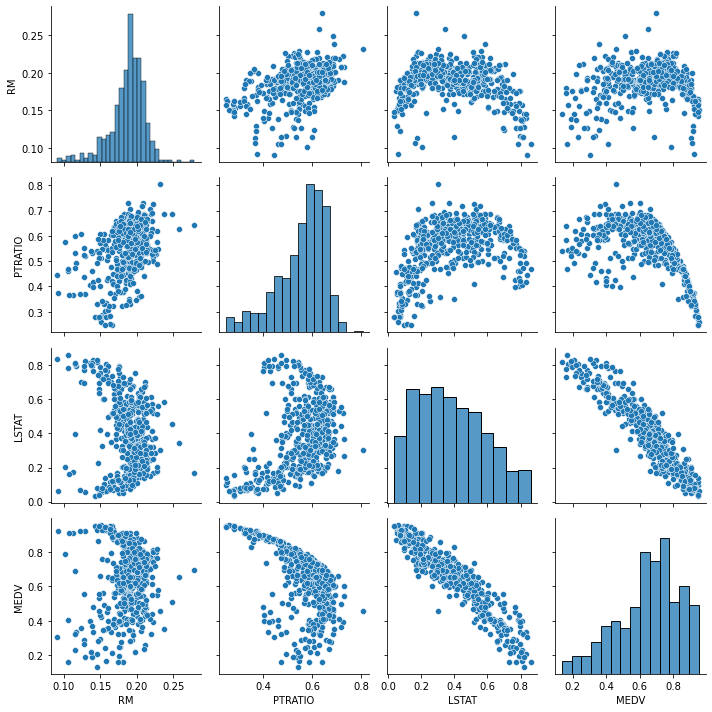

In [174]:
sns.pairplot(df2, size=2.5)
plt.tight_layout()

## Defining metrics

In [176]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

## Shuffle and Split Data

In [177]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split
prices = df2['MEDV']
features = df2.drop('MEDV', axis = 1)
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

## Task 2: Train a model (or multiple).

### Linear Regression

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# creating the Regressor
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# make predictions and evaluate the results
predict_y = regressor.predict(X_test)
print('R-squared: ', r2_score(y_test, predict_y))

R-squared:  0.9036647987006363


Feature: 0, Score: 0.64631
Feature: 1, Score: -0.49719
Feature: 2, Score: -0.72255


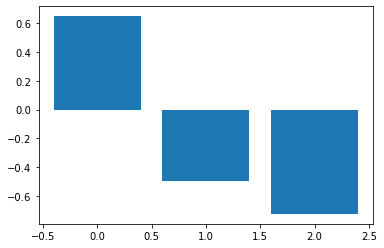

In [181]:
importance = regressor.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Random Forest

In [188]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
print('R-squared : ', r2_score(y_test, predictions))

R-squared :  0.9723388283430555


Feature: 0, Score: 0.00467
Feature: 1, Score: 0.19700
Feature: 2, Score: 0.79832


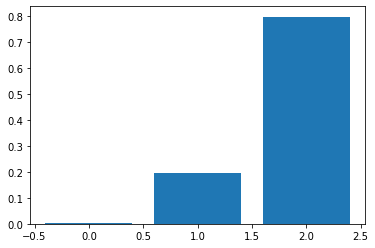

In [183]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Support Vector Machine

In [190]:
from sklearn.svm import SVR
regressor = SVR(kernel="linear")
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print("R-squared: ", r2_score(y_test, y_pred))

R-squared:  0.9045545646330374


In [186]:
regressor.coef_

array([[ 0.13634369, -0.41382516, -0.83283641]])

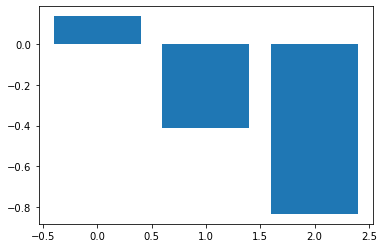

In [187]:
features= [0,1,2,]
regressor_coef=[ 0.13634369, -0.41382516, -0.83283641]
plt.bar(features,regressor_coef)
plt.show()

## Establish a baseline and show us the final ML model.

In [192]:
# generate a new dataframe with all the prediction results
boston_housing=X_test.merge(y_test, left_index=True, right_index=True)
boston_housing['Prediction_LR'] = predict_y
boston_housing['Prediction_RF'] = predictions
boston_housing['Prediction_SVM'] = y_pred
boston_housing.iloc[:,3:]

,MEDV,Prediction_LR,Prediction_RF,Prediction_SVM
173,0.602625,0.648397,0.653444,0.675932
274,0.702835,0.697903,0.700139,0.703266
491,0.651889,0.558774,0.628331,0.540115
72,0.905551,0.957791,0.901118,0.982204
452,0.650469,0.654701,0.656148,0.657257
...,...,...,...,...
412,0.606605,0.531625,0.589247,0.522102
436,0.863530,0.890365,0.860741,0.917688
411,0.731573,0.734171,0.733547,0.749671
86,0.399194,0.446481,0.407248,0.419552


## Evaluate the performance of such model.

In [194]:
# print Random Forest parameters in use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [195]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [196]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [200]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [197]:
# Evaluate the model with the best parameters generated from the Randomized Search Cross Validation
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mse = mean_squared_error(y_test, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('MSE = {:0.2f}%.'.format(mse))
    
    return mse

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_mse = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_mse = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (base_mse - random_mse) / base_mse))

Model Performance
Average Error: 0.0169 degrees.
MSE = 0.00%.
Model Performance
Average Error: 0.0161 degrees.
MSE = 0.00%.
Improvement of 4.17%.


In [202]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators':  [1400],
 'min_samples_split':[2],
 'min_samples_leaf': [1],
 'max_features': ['auto'],
 'max_depth':  [100],
 'bootstrap': [True]}

# Create a based model
rf = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [203]:
# Evaluate the model with the best parameters generated from the Grid Search Cross Validation
best_grid = grid_search.best_estimator_
grid_mse = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (base_mse - grid_mse) / base_mse))

Model Performance
Average Error: 0.0160 degrees.
MSE = 0.00%.
Improvement of 4.73%.
